In [ ]:
import sqlite3
import pandas as pd
import datetime
import requests

In [ ]:
data = requests.get('http://ec2-65-2-37-66.ap-south-1.compute.amazonaws.com/data/current?points=175392')

In [ ]:
df=pd.DataFrame(data.json())

In [ ]:
df.head()

,date,temperature
0,1997-12-29T01:00:00.000Z,23.7
1,1997-12-29T02:00:00.000Z,23.2
2,1997-12-29T03:00:00.000Z,23.2
3,1997-12-29T04:00:00.000Z,23.2
4,1997-12-29T05:00:00.000Z,22.8


In [ ]:
df["date"]=pd.to_datetime(df["date"])

In [ ]:
df

,date,temperature
0,1997-12-29 01:00:00+00:00,23.7
1,1997-12-29 02:00:00+00:00,23.2
2,1997-12-29 03:00:00+00:00,23.2
3,1997-12-29 04:00:00+00:00,23.2
4,1997-12-29 05:00:00+00:00,22.8
...,...,...
175387,2017-12-31 20:00:00+00:00,22.1
175388,2017-12-31 21:00:00+00:00,21.7
175389,2017-12-31 22:00:00+00:00,21.2
175390,2017-12-31 23:00:00+00:00,21.1


In [ ]:
df=df.set_index("date")

In [ ]:
df = df.resample('H').mean().interpolate(method='linear', limit_direction='forward')
df

,temperature
date,
1997-12-29 01:00:00+00:00,23.7
1997-12-29 02:00:00+00:00,23.2
1997-12-29 03:00:00+00:00,23.2
1997-12-29 04:00:00+00:00,23.2
1997-12-29 05:00:00+00:00,22.8
...,...
2017-12-31 20:00:00+00:00,22.1
2017-12-31 21:00:00+00:00,21.7
2017-12-31 22:00:00+00:00,21.2


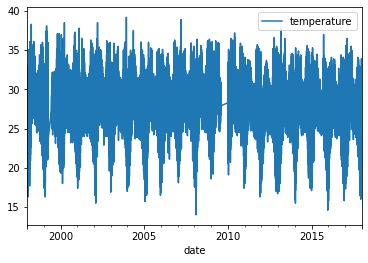

In [ ]:
df.plot()

In [ ]:
dataframe = df.copy()
datetime_df = df.index.copy()
datetime_df

DatetimeIndex(['1997-12-29 01:00:00+00:00', '1997-12-29 02:00:00+00:00',
               '1997-12-29 03:00:00+00:00', '1997-12-29 04:00:00+00:00',
               '1997-12-29 05:00:00+00:00', '1997-12-29 06:00:00+00:00',
               '1997-12-29 07:00:00+00:00', '1997-12-29 08:00:00+00:00',
               '1997-12-29 09:00:00+00:00', '1997-12-29 10:00:00+00:00',
               ...
               '2017-12-31 15:00:00+00:00', '2017-12-31 16:00:00+00:00',
               '2017-12-31 17:00:00+00:00', '2017-12-31 18:00:00+00:00',
               '2017-12-31 19:00:00+00:00', '2017-12-31 20:00:00+00:00',
               '2017-12-31 21:00:00+00:00', '2017-12-31 22:00:00+00:00',
               '2017-12-31 23:00:00+00:00', '2018-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=175392, freq='H')

In [ ]:
for i in range(1, 336):
    dataframe.loc[:, f'temp_{i}'] = dataframe.temperature.shift(-i)
    datetime_df = datetime_df.shift(1)[:-1]
dataframe.dropna(inplace=True)
dataframe

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value

  self.obj[key] = value



,temperature,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,...,temp_326,temp_327,temp_328,temp_329,temp_330,temp_331,temp_332,temp_333,temp_334,temp_335
date,,,,,,,,,,,,,,,,,,,,,
1997-12-29 01:00:00+00:00,23.7,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,...,31.3,29.3,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3
1997-12-29 02:00:00+00:00,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,...,29.3,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0
1997-12-29 03:00:00+00:00,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,...,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0
1997-12-29 04:00:00+00:00,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,28.7,...,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8
1997-12-29 05:00:00+00:00,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,28.7,28.4,...,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8,23.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-17 21:00:00+00:00,23.8,23.6,22.8,21.7,20.6,20.3,20.3,19.9,19.5,19.4,...,26.1,25.5,26.0,26.1,25.1,24.4,23.6,23.1,22.7,22.1
2017-12-17 22:00:00+00:00,23.6,22.8,21.7,20.6,20.3,20.3,19.9,19.5,19.4,19.4,...,25.5,26.0,26.1,25.1,24.4,23.6,23.1,22.7,22.1,21.7
2017-12-17 23:00:00+00:00,22.8,21.7,20.6,20.3,20.3,19.9,19.5,19.4,19.4,19.7,...,26.0,26.1,25.1,24.4,23.6,23.1,22.7,22.1,21.7,21.2


In [ ]:
datetime_df

0                              NaT
1                              NaT
2                              NaT
3                              NaT
4                              NaT
                    ...           
175052   2017-12-03 22:00:00+00:00
175053   2017-12-03 23:00:00+00:00
175054   2017-12-04 00:00:00+00:00
175055   2017-12-04 01:00:00+00:00
175056   2017-12-04 02:00:00+00:00
Name: date, Length: 175057, dtype: datetime64[ns, UTC]

In [ ]:
shift = 5 * 24
dataframe['Temp_Pred_True'] = dataframe.temp_335.shift(-shift)
datetime_df = datetime_df.shift(shift)[:-shift]
dataframe.dropna(inplace=True)
dataframe

,date,temperature,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,...,temp_327,temp_328,temp_329,temp_330,temp_331,temp_332,temp_333,temp_334,temp_335,Temp_Pred_True
0,1997-12-29 01:00:00+00:00,23.7,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,...,29.3,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.2
1,1997-12-29 02:00:00+00:00,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,...,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,21.8
2,1997-12-29 03:00:00+00:00,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,...,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,21.2
3,1997-12-29 04:00:00+00:00,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,...,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8,21.1
4,1997-12-29 05:00:00+00:00,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,28.7,...,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8,23.2,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174812,2017-12-07 21:00:00+00:00,21.9,21.8,20.9,20.4,20.0,19.5,19.3,19.2,19.2,...,27.0,26.1,26.4,25.9,25.6,24.8,24.5,23.8,23.7,25.2
174813,2017-12-07 22:00:00+00:00,21.8,20.9,20.4,20.0,19.5,19.3,19.2,19.2,19.0,...,26.1,26.4,25.9,25.6,24.8,24.5,23.8,23.7,23.5,25.3
174814,2017-12-07 23:00:00+00:00,20.9,20.4,20.0,19.5,19.3,19.2,19.2,19.0,18.8,...,26.4,25.9,25.6,24.8,24.5,23.8,23.7,23.5,23.4,24.7
174815,2017-12-08 00:00:00+00:00,20.4,20.0,19.5,19.3,19.2,19.2,19.0,18.8,18.9,...,25.9,25.6,24.8,24.5,23.8,23.7,23.5,23.4,23.1,24.2


In [ ]:
dataframe.loc[:'2016-12-31 23:00:00']['Temp_Pred_True']

date
1998-01-17 00:00:00+00:00    23.200
1998-01-17 01:00:00+00:00    21.800
1998-01-17 02:00:00+00:00    21.200
1998-01-17 03:00:00+00:00    21.100
1998-01-17 04:00:00+00:00    20.800
                              ...  
2016-12-31 19:00:00+00:00    23.084
2016-12-31 20:00:00+00:00    23.120
2016-12-31 21:00:00+00:00    23.156
2016-12-31 22:00:00+00:00    23.192
2016-12-31 23:00:00+00:00    23.228
Freq: H, Name: Temp_Pred_True, Length: 166176, dtype: float64

In [ ]:
df.loc['1995-01-20 00:00:00':'2016-12-31 23:00:00']['temperature']

date
1997-12-29 01:00:00+00:00    23.700
1997-12-29 02:00:00+00:00    23.200
1997-12-29 03:00:00+00:00    23.200
1997-12-29 04:00:00+00:00    23.200
1997-12-29 05:00:00+00:00    22.800
                              ...  
2016-12-31 19:00:00+00:00    23.084
2016-12-31 20:00:00+00:00    23.120
2016-12-31 21:00:00+00:00    23.156
2016-12-31 22:00:00+00:00    23.192
2016-12-31 23:00:00+00:00    23.228
Freq: H, Name: temperature, Length: 166631, dtype: float64

In [ ]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sktime.utils.plotting import plot_series
import os

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
dataframe

,temperature,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,...,temp_327,temp_328,temp_329,temp_330,temp_331,temp_332,temp_333,temp_334,temp_335,Temp_Pred_True
date,,,,,,,,,,,,,,,,,,,,,
1998-01-17 00:00:00+00:00,23.7,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,...,29.3,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.2
1998-01-17 01:00:00+00:00,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,...,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,21.8
1998-01-17 02:00:00+00:00,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,...,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,21.2
1998-01-17 03:00:00+00:00,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,28.7,...,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8,21.1
1998-01-17 04:00:00+00:00,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,28.7,28.4,...,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8,23.2,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 20:00:00+00:00,22.5,21.6,20.5,20.2,19.9,19.4,19.3,19.0,18.5,17.8,...,29.4,27.8,26.9,27.0,27.0,26.3,25.8,25.6,25.2,22.1
2017-12-31 21:00:00+00:00,21.6,20.5,20.2,19.9,19.4,19.3,19.0,18.5,17.8,17.8,...,27.8,26.9,27.0,27.0,26.3,25.8,25.6,25.2,25.3,21.7
2017-12-31 22:00:00+00:00,20.5,20.2,19.9,19.4,19.3,19.0,18.5,17.8,17.8,18.1,...,26.9,27.0,27.0,26.3,25.8,25.6,25.2,25.3,24.7,21.2


In [ ]:
train_df = dataframe.loc[:'2016-12-31 23:00:00']
test_df = dataframe.loc['2017-01-01 00:00:00':]

In [ ]:
train_df.shape[0]+test_df.shape[0]


174937

In [ ]:
import pickle

**LIGHTGBM**

In [ ]:
def eval_and_save():
    
    # Model creation
    X_train = train_df.values[:, :-1]
    y_train = train_df.values[:, -1]
    
    gbm = LGBMRegressor(n_estimators=1000, random_state=1, n_jobs=100)
    gbm.fit(X_train, y_train)

    X = test_df.values[:, :-1]
    y = test_df.values[:, -1]

    with open("model.pkl","wb") as f:
      pickle.dump(gbm,f)
    
    # # Output from model
    
    
    pred = gbm.predict(X[:120])

    return pred
    
    

In [ ]:
x=eval_and_save()
print(x)

[23.48370912 22.73198478 22.30078384 21.60484036 21.88434018 21.34577152
 20.37220868 20.22648386 20.72273152 21.94798193 25.10800063 27.55225216
 29.5401934  29.20699782 30.10159155 29.10718039 28.91742427 27.97234502
 26.50477468 25.35688726 24.58209165 24.80672773 23.83703076 24.0018421
 23.76539345 23.1927213  22.61443652 22.76509087 21.83567898 21.67050315
 21.67840386 21.57016729 21.06714616 22.11509364 24.97840928 27.23913418
 29.39525738 29.87487661 28.95661785 29.20245699 29.06585356 29.05136541
 27.59173424 26.69062105 25.84178133 25.59807949 24.97730332 24.4596686
 23.35402254 23.14936773 22.77291574 22.60586977 22.84218216 22.04325201
 22.07135329 21.5249504  21.3323646  22.21619384 25.12136589 27.95468112
 28.9566142  28.88108108 29.13960552 27.95244019 27.57842518 26.94249554
 25.99409885 25.34939025 24.75669239 24.46465026 24.52554144 24.07734536
 22.61336676 22.22199423 21.90827566 21.98191093 21.89940754 21.88783464
 21.10127782 20.84624282 20.48342054 21.47522149 23.9

**NEURAL PROPHET**

In [ ]:
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
model=NeuralProphet(
    n_lags=5,
    weekly_seasonality=False,
    learning_rate=0.01,
    epochs=25,
    batch_size=31
)

In [ ]:
train_df=train_df.rename_axis("ds")

In [ ]:
train_df=train_df.rename(columns={"Temp_Pred_True":"y"})

In [ ]:
train_df

,temperature,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,...,temp_327,temp_328,temp_329,temp_330,temp_331,temp_332,temp_333,temp_334,temp_335,y
ds,,,,,,,,,,,,,,,,,,,,,
1998-01-17 00:00:00+00:00,23.7,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,...,29.3,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.200
1998-01-17 01:00:00+00:00,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,...,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,21.800
1998-01-17 02:00:00+00:00,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,...,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,21.200
1998-01-17 03:00:00+00:00,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,28.7,...,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8,21.100
1998-01-17 04:00:00+00:00,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,28.7,28.4,...,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8,23.2,20.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,22.7,22.6,22.2,21.8,20.6,19.7,19.4,18.8,18.7,18.9,...,24.5,24.9,25.5,25.7,25.4,25.2,24.9,24.2,23.6,23.084
2016-12-31 20:00:00+00:00,22.6,22.2,21.8,20.6,19.7,19.4,18.8,18.7,18.9,19.0,...,24.9,25.5,25.7,25.4,25.2,24.9,24.2,23.6,23.1,23.120
2016-12-31 21:00:00+00:00,22.2,21.8,20.6,19.7,19.4,18.8,18.7,18.9,19.0,19.1,...,25.5,25.7,25.4,25.2,24.9,24.2,23.6,23.1,22.7,23.156


In [ ]:
for i in range(len(train_df)):
  train_df["index"]


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



In [ ]:
train_df.set_index(index")

,temperature,temp_1,temp_2,temp_3,temp_4,temp_5,temp_6,temp_7,temp_8,temp_9,...,temp_327,temp_328,temp_329,temp_330,temp_331,temp_332,temp_333,temp_334,temp_335,Temp_Pred_True
index,,,,,,,,,,,,,,,,,,,,,
0,23.7,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,...,29.3,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.200
1,23.2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,...,28.8,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,21.800
2,23.2,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,...,27.8,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,21.200
3,23.2,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,28.7,...,27.0,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8,21.100
4,22.8,22.4,22.5,22.7,22.4,22.7,25.6,27.4,28.7,28.4,...,26.6,25.2,25.5,24.5,23.3,23.0,24.0,23.8,23.2,20.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166171,22.7,22.6,22.2,21.8,20.6,19.7,19.4,18.8,18.7,18.9,...,24.5,24.9,25.5,25.7,25.4,25.2,24.9,24.2,23.6,23.084
166172,22.6,22.2,21.8,20.6,19.7,19.4,18.8,18.7,18.9,19.0,...,24.9,25.5,25.7,25.4,25.2,24.9,24.2,23.6,23.1,23.120
166173,22.2,21.8,20.6,19.7,19.4,18.8,18.7,18.9,19.0,19.1,...,25.5,25.7,25.4,25.2,24.9,24.2,23.6,23.1,22.7,23.156
